In [42]:
import nltk
nltk.download("cess_esp")
from nltk.corpus import cess_esp

# Read the corpus into a list, 
# each entry in the list is one sentence.


[nltk_data] Downloading package cess_esp to /home/jaume/nltk_data...
[nltk_data]   Package cess_esp is already up-to-date!


## Preproceso del corpus

In [76]:
cess_sents = cess_esp.tagged_sents()
processed_cess_sents = []
for phrase in cess_sents:
    processed_phrase = []
    for w in phrase:
        tag = ''
        if w[0] == '*0*':
            continue
        if len(w[1]) > 2:
            if w[1][0] == 'v':
                tag=w[1][:3]
            else:
                tag=w[1][:2]
        else:
            tag = w[1]

        processed_phrase.append((w[0],tag))
    processed_cess_sents.append(processed_phrase)


90 % de train y 10% de test

In [54]:
train_n = round(len(processed_cess_sents) * 0.9)
train_data = processed_cess_sents[:train_n]
test_data = processed_cess_sents[train_n:]

## Uso de Hiden Markov Models

In [55]:
from nltk.tag import hmm

trainer = hmm.HiddenMarkovModelTrainer()
hmm_tagger = trainer.train(train_data)
acc = hmm_tagger.accuracy(test_data)
print("Exactitud del modelo:", acc)

Exactitud del modelo: 0.27393181479827305


Ejemplo de tagging con un HMM dada una frase aleatoria del conjunto de test

In [63]:
import random
phrase_id  =random.randint(0,len(test_data))
tokens = [i[0] for i in test_data[phrase_id]]
print(' '.join(tokens))
tagged_sentence = hmm_tagger.tag(tokens)
print(test_data[phrase_id])
print(tagged_sentence)

Jáuregui entiende que Corcuera tiene motivos para estar deprimido : - A finales del 93 estaba en la cresta de la ola , muy feliz incluso por su dimisión .
[('Jáuregui', 'np'), ('entiende', 'vmi'), ('que', 'cs'), ('Corcuera', 'np'), ('tiene', 'vmi'), ('motivos', 'nc'), ('para', 'sp'), ('estar', 'vmn'), ('deprimido', 'aq'), (':', 'Fd'), ('-', 'Fg'), ('A', 'sp'), ('finales', 'nc'), ('del', 'sp'), ('93', 'W'), ('estaba', 'vmi'), ('en', 'sp'), ('la', 'da'), ('cresta', 'nc'), ('de', 'sp'), ('la', 'da'), ('ola', 'nc'), (',', 'Fc'), ('muy', 'rg'), ('feliz', 'aq'), ('incluso', 'rg'), ('por', 'sp'), ('su', 'dp'), ('dimisión', 'nc'), ('.', 'Fp')]
[('Jáuregui', 'np'), ('entiende', 'vmi'), ('que', 'cs'), ('Corcuera', 'np'), ('tiene', 'vmi'), ('motivos', 'nc'), ('para', 'sp'), ('estar', 'vmn'), ('deprimido', 'aq'), (':', 'Fd'), ('-', 'Fg'), ('A', 'sp'), ('finales', 'nc'), ('del', 'sp'), ('93', 'Z'), ('estaba', 'vmi'), ('en', 'sp'), ('la', 'pp'), ('cresta', 'da'), ('de', 'da'), ('la', 'da'), ('ola', 

## Uso de Trigrams 'n' Tags

In [58]:
from nltk.tag import tnt

tnt_tagger = tnt.TnT()
tnt_tagger.train(train_data)
acc = tnt_tagger.accuracy(test_data)
print("Exactitud del modelo:", acc)

Exactitud del modelo: 0.8254429060592526


Ejemplo de tagging con un TnT dada una frase aleatoria del conjunto de test

In [66]:
import random
phrase_id  =random.randint(0,len(test_data))
tokens = [i[0] for i in test_data[phrase_id]]
print(' '.join(tokens))
tagged_sentence = tnt_tagger.tag(tokens)
print(test_data[phrase_id])
print(tagged_sentence)

Son tan amables , dicen altas , pagan también a las feas y a las guapas , beben ron y coca-cola , van a Point_Cumama .
[('Son', 'vsi'), ('tan', 'rg'), ('amables', 'aq'), (',', 'Fc'), ('dicen', 'vmi'), ('altas', 'aq'), (',', 'Fc'), ('pagan', 'vmi'), ('también', 'rg'), ('a', 'sp'), ('las', 'da'), ('feas', 'aq'), ('y', 'cc'), ('a', 'sp'), ('las', 'da'), ('guapas', 'nc'), (',', 'Fc'), ('beben', 'vmi'), ('ron', 'nc'), ('y', 'cc'), ('coca-cola', 'nc'), (',', 'Fc'), ('van', 'vmi'), ('a', 'sp'), ('Point_Cumama', 'np'), ('.', 'Fp')]
[('Son', 'vsi'), ('tan', 'rg'), ('amables', 'Unk'), (',', 'Fc'), ('dicen', 'vmi'), ('altas', 'aq'), (',', 'Fc'), ('pagan', 'vmi'), ('también', 'rg'), ('a', 'sp'), ('las', 'da'), ('feas', 'Unk'), ('y', 'cc'), ('a', 'sp'), ('las', 'da'), ('guapas', 'Unk'), (',', 'Fc'), ('beben', 'Unk'), ('ron', 'nc'), ('y', 'cc'), ('coca-cola', 'Unk'), (',', 'Fc'), ('van', 'vmi'), ('a', 'sp'), ('Point_Cumama', 'Unk'), ('.', 'Fp')]


## 10-fold cross validation

In [82]:
folds = []
step = int(len(processed_cess_sents) // 10)
for i in range(0,len(processed_cess_sents),step):
    folds.append(processed_cess_sents[i:(i+step)])

folds[-1] = processed_cess_sents[step*9:]




#### Para HMM

In [87]:
hmms_acc = []
from random import shuffle
for i in range(10):
    print("Entrenando el modelo nº",(i+1),"de 10")
    fold_test_data = folds[i]
    fold_train_data = [fold for j, fold in enumerate(folds) if j != i]
    fold_train_data = [item for sublist in fold_train_data for item in sublist]
    shuffle(fold_train_data)

    trainer = hmm.HiddenMarkovModelTrainer()
    hmm_tagger = trainer.train(fold_train_data)
    acc = hmm_tagger.accuracy(fold_test_data)
    hmms_acc.append(acc)

[0.24788907652653097, 0.23194708707076198, 0.27897165458141066, 0.19823299591546795, 0.2907735732557114, 0.26519446275543834, 0.24853325793454442, 0.3500441826215022, 0.2330190959632584, 0.27393181479827305]


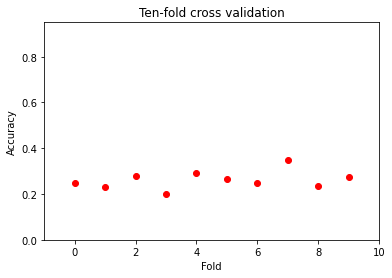

In [90]:
import matplotlib.pyplot as plt
x=[i for i in range(10)]
y=hmms_acc
plt.axis([-1, 10, 0, 0.95])
plt.ylabel('Accuracy')
plt.xlabel('Fold')
plt.title('Ten-fold cross validation')
plt.plot(x,y,'ro')
#plt.errorbar(x,y,yerr=ic,linestyle='None')
plt.show()

#### Para TnT

In [93]:
from nltk.tag import tnt

tnt_acc = []
from random import shuffle
for i in range(10):
    print("Entrenando el modelo nº",(i+1),"de 10")
    fold_test_data = folds[i]
    fold_train_data = [fold for j, fold in enumerate(folds) if j != i]
    fold_train_data = [item for sublist in fold_train_data for item in sublist]
    shuffle(fold_train_data)

    tnt_tagger = tnt.TnT()
    tnt_tagger.train(fold_train_data)
    acc = tnt_tagger.accuracy(fold_test_data)
    tnt_acc.append(acc)

Entrenando el modelo nº 1 de 10
Entrenando el modelo nº 2 de 10
Entrenando el modelo nº 3 de 10
Entrenando el modelo nº 4 de 10
Entrenando el modelo nº 5 de 10
Entrenando el modelo nº 6 de 10
Entrenando el modelo nº 7 de 10
Entrenando el modelo nº 8 de 10
Entrenando el modelo nº 9 de 10
Entrenando el modelo nº 10 de 10


Genera la gráfica

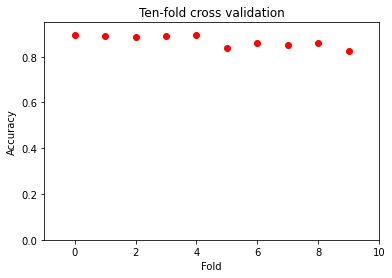

In [94]:
import matplotlib.pyplot as plt
x=[i for i in range(10)]
y=tnt_acc
plt.axis([-1, 10, 0, 0.95])
plt.ylabel('Accuracy')
plt.xlabel('Fold')
plt.title('Ten-fold cross validation')
plt.plot(x,y,'ro')
#plt.errorbar(x,y,yerr=ic,linestyle='None')
plt.show()